#**CHALLENGE TELECOM X 2**

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

##**Extracción del Archivo Tratado**

Cargar y visualizar el archivo CSV que contiene los datos tratados anteriormente para comprender su estructura y contenido inicial.

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/DnRiv/Challenge-Alura-Telecom-2/refs/heads/main/datos_tratados.csv"

df = pd.read_csv(url)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,1.84,55.15,742.90
7039,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,1.68,50.30,92.75
7041,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,2.26,67.85,4627.65


##**Eliminación de Columnas Irrelevantes**

Eliminar variables que no aportan información relevante para el modelado.

In [3]:
df= df.drop('CustomerID', axis=1)

In [4]:
df.head(2)

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,2.19,65.6,593.3
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,2.00,59.9,542.4


In [5]:
# Comprueba valores
df.isnull().sum()

,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###Análisis inicial y separación de variables

Identificar y separar variables categóricas y numéricas para definir estrategias de preprocesamiento.

El dataset contiene información de clientes con variables de diferentes tipos. Antes de realizar transformaciones o análisis estadísticos, es importante clasificar las variables según su naturaleza, ya que cada tipo requiere un tratamiento distinto.

####Variable respuesta

1. Variables objetivo
Churn → Variable binaria que indica si el cliente se dio de baja (1) o no (0).

    Tipo: Categórica binaria (target)

In [6]:
df_mod = df.copy()

In [7]:
y = df_mod['Churn']

####Varibales Explicativas

In [8]:
X = df_mod.drop('Churn', axis=1)

#### Variables categóricas nominales
(No tienen orden intrínseco)

* Gender
* Partner
* Dependents
* PhoneService
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaperlessBilling
* PaymentMethod

**Nota:** Algunas variables como MultipleLines e InternetService pueden tener respuestas como "No phone service" o "No internet service", que no son simples “No” y deben tratarse con cuidado para evitar interpretaciones erróneas.

In [9]:
X_cat_nominal= X[[
              "Gender",
              "SeniorCitizen",   # Binaria según diccionario
              "Partner",
              "Dependents",
              "PhoneService",
              "MultipleLines",
              "InternetService",
              "OnlineSecurity",
              "OnlineBackup",
              "DeviceProtection",
              "TechSupport",
              "StreamingTV",
              "StreamingMovies",
              "PaperlessBilling",
              "PaymentMethod"
]]

##### Detección visual / lógica de negocio
Antes de cualquier cálculo, se revisa las descripciones de las variables:

Si “StreamingTV” = “Yes” implica necesariamente “InternetService” ≠ “No”, entonces hay dependencia.

Esto se valida mirando tablas de contingencia para ver si alguna combinación es imposible.

In [10]:
# Por ejemplo
pd.crosstab(X['InternetService'], X['StreamingTV'])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


Confirmamos que una variable es determinante de la otra; Para comporbar las variables categoricas calculamos la V de Cramér.

##### V de Cramér

In [11]:
from scipy.stats import chi2_contingency
from itertools import combinations

In [12]:
# Función para calcular V de Cramér
v_cramer = lambda x,y: np.sqrt(
    chi2_contingency(pd.crosstab(x,y))[0] /
    (pd.crosstab(x,y).values.sum() * (min(pd.crosstab(x,y).shape)-1))
)

results = {}

# Calcular V de Cramér para cada pareja de variables
for var1, var2 in combinations(X_cat_nominal, 2):
    v = v_cramer(X[var1], X[var2])
    results[(var1, var2)] = v

# Mostrar parejas con alta asociación
print("Pairs with Cramér's V > 0.6:")
for pair, val in sorted(results.items(), key=lambda x: x[1], reverse=True):
    if val > 0.6:
        print(f"{pair[0]} & {pair[1]}: {val:.2f}")

Pairs with Cramér's V > 0.6:
PhoneService & MultipleLines: 1.00
StreamingTV & StreamingMovies: 0.77
DeviceProtection & StreamingMovies: 0.74
DeviceProtection & StreamingTV: 0.73
OnlineSecurity & TechSupport: 0.73
DeviceProtection & TechSupport: 0.73
InternetService & OnlineSecurity: 0.72
InternetService & TechSupport: 0.72
OnlineBackup & TechSupport: 0.72
OnlineBackup & DeviceProtection: 0.72
OnlineSecurity & OnlineBackup: 0.72
OnlineSecurity & DeviceProtection: 0.72
InternetService & StreamingTV: 0.72
TechSupport & StreamingMovies: 0.72
TechSupport & StreamingTV: 0.72
InternetService & StreamingMovies: 0.72
OnlineBackup & StreamingTV: 0.71
OnlineBackup & StreamingMovies: 0.71
OnlineSecurity & StreamingMovies: 0.71
OnlineSecurity & StreamingTV: 0.71
InternetService & OnlineBackup: 0.71
InternetService & DeviceProtection: 0.71


#####Interpretación
Esto es común en estos datasets con muchas variables de servicios; están súper relacionadas, porque si por ejemplo: Si no tienes internet, no tienes streaming o si no tienes teléfono, no tienes múltiples líneas, etc.

Analizando los resultados, se decide:

* Mantener las variables de partida o generales, como InternetService y PhoneService.

* Eliminar las variables que solo replican o dependen directamente de esas (como StreamingTV, StreamingMovies, MultipleLines).

Esto es un caso claro de colinealidad entre variables categóricas. Mantener ambas (Variable de partida y variable replica) no agrega información nueva y puede confundir al modelo, sobre todo en modelos lineales como LinearRegression, que son sensibles a multicolinealidad.

En RandomForest no es tan crítico, pero aún así puede redundar y afectar interpretabilidad.

Variables para eliminar (porque dependen directamente o son redundantes):

* MultipleLines (depende de PhoneService)
* StreamingTV (depende de InternetService)
* StreamingMovies (depende de InternetService)
* OnlineSecurity (depende de InternetService)
* OnlineBackup (depende de InternetService)
* DeviceProtection (depende de InternetService)
* TechSupport (depende de InternetService)

In [13]:
X_cat_nominal = X_cat_nominal.drop(['MultipleLines', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'], axis=1)

In [14]:
X_cat_nominal.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'InternetService', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [57]:
# Función para calcular V de Cramér
v_cramer = lambda x, y: np.sqrt(
    chi2_contingency(pd.crosstab(x, y))[0] /
    (pd.crosstab(x, y).values.sum() * (min(pd.crosstab(x, y).shape) - 1))
)

results = {}

# Calcular V de Cramér para cada pareja de variables
for var1, var2 in combinations(X_cat_nominal, 2):
    v = v_cramer(X[var1], X[var2])
    results[(var1, var2)] = v

# Mostrar parejas con alta asociación
threshold = 0.6
high_pairs = [(pair, val) for pair, val in results.items() if val > threshold]

if high_pairs:
    print(f"Pairs with Cramér's V > {threshold}:")
    for pair, val in sorted(high_pairs, key=lambda x: x[1], reverse=True):
        print(f"{pair[0]} & {pair[1]}: {val:.2f}")
else:
    print(f"No se encontraron pares con Cramér's V mayor a {threshold}.")


No se encontraron pares con Cramér's V mayor a 0.6.


Con este resultado comprobamos que  solucionamos la colinealidad de las variables categóricas nominales.

####Variables categóricas ordinales
* Contract

In [16]:
# Month-to-month < One year < Two year
X_cat_ordinal = X[[
    "Contract"
]]

In [17]:
X_cat_ordinal.columns

Index(['Contract'], dtype='object')

####Variables numéricas continuas
* ChargesDaily
* ChargesMonthly
* ChargesTotal

**Importante:** Existe alta probabilidad de colinealidad entre:

  ChargesDaily y ChargesMonthly (relación directa: ChargesMonthly ≈ ChargesDaily * ~30)
  ChargesTotal y (ChargesMonthly × Tenure)

  Estas relaciones pueden distorsionar análisis como VIF o modelos lineales.

In [18]:
X_num_continuous = X[[
    "ChargesDaily",
    "ChargesMonthly",
    "ChargesTotal"
]]

#####Matriz de Correlación

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

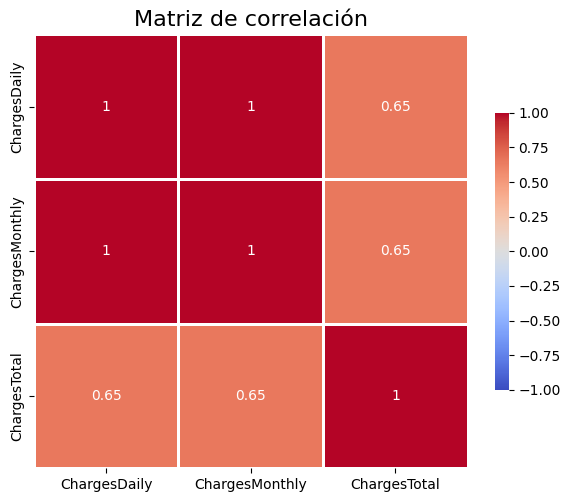

In [20]:
# Calcular correlacion
corr_num_continous = X_num_continuous.corr()

fig, ax = plt.subplots(figsize=(7, 9))
sns.heatmap(
    np.round(corr_num_continous, 2),
    vmax=1, vmin=-1, center=0,
    cmap='coolwarm',
    square=True, linewidths=.8, annot=True,
    cbar_kws={"shrink": .4}
)
plt.title("Matriz de correlación", fontsize=16)
plt.show()

In [21]:
corr_num_continous

,ChargesDaily,ChargesMonthly,ChargesTotal
ChargesDaily,1.000000,0.999996,0.651197
ChargesMonthly,0.999996,1.000000,0.651182
ChargesTotal,0.651197,0.651182,1.000000


#####Interpretación

ChargesDaily y ChargesMonthly están casi perfectamente correlacionadas (0.999996). Son básicamente la misma información en distinta escala.

ChargesTotal está solo moderadamente correlacionada con las otras dos (~0.65). Esto tiene sentido porque depende del tiempo que el cliente lleva, no solo del consumo mensual.

#####Se decide:
Eliminar ChargesDaily porque aporta la misma información que ChargesMonthly pero con más ruido (variaciones diarias).

ChargesTotal aporta algo diferente (acumulado total), pero puede introducir colinealidad con Tenure (meses de contrato).

Mantener ChargesMonthly porque es estable y representativa del gasto habitual.

In [22]:
X_num_continuous = X_num_continuous.drop(['ChargesDaily', 'ChargesTotal'], axis=1)

In [23]:
X_num_continuous.columns

Index(['ChargesMonthly'], dtype='object')

####**Variables numéricas discretas**


*   Tenure



In [24]:
X_num_discrete = X[[
    "Tenure"  # Meses de contrato
]]

In [25]:
df[['Tenure','Churn']].corr()

,Tenure,Churn
Tenure,1.000000,-0.352229
Churn,-0.352229,1.000000


In [26]:
X_num_discrete.columns

Index(['Tenure'], dtype='object')

#####Interpretación

Correlación = -0.3522 → Relación negativa moderada.

Significa que a mayor Tenure (tiempo como cliente), menor probabilidad de churn.

No es una correlación alta (|r|<0.5), pero es lo suficientemente relevante para conservarla como variable predictora.

Los clientes con más tiempo en la compañía tienden a permanecer, aunque el tiempo por sí solo no explica todo el churn.

In [27]:
# Une las variables explicativas en un df
X = pd.concat([X_cat_nominal, X_cat_ordinal, X_num_continuous, X_num_discrete], axis=1)
X

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,PaperlessBilling,PaymentMethod,Contract,ChargesMonthly,Tenure
0,Female,0,1,1,1,DSL,1,Mailed check,One year,65.60,9
1,Male,0,0,0,1,DSL,0,Mailed check,Month-to-month,59.90,9
2,Male,0,0,0,1,Fiber optic,1,Electronic check,Month-to-month,73.90,4
3,Male,1,1,0,1,Fiber optic,1,Electronic check,Month-to-month,98.00,13
4,Female,1,1,0,1,Fiber optic,1,Mailed check,Month-to-month,83.90,3
...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,0,0,1,DSL,0,Mailed check,One year,55.15,13
7039,Male,0,1,0,1,Fiber optic,1,Electronic check,Month-to-month,85.10,22
7040,Male,0,0,0,1,DSL,1,Mailed check,Month-to-month,50.30,2
7041,Male,0,1,1,1,DSL,0,Mailed check,Two year,67.85,67


##**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos.
Verificar el balance de clases para evaluar la necesidad de técnicas de balanceo.

In [28]:
pd.DataFrame(y).value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


In [29]:
print(y.shape)
print(X.shape)
print(X.info())

(7043,)
(7043, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   InternetService   7043 non-null   object 
 6   PaperlessBilling  7043 non-null   int64  
 7   PaymentMethod     7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   ChargesMonthly    7043 non-null   float64
 10  Tenure            7043 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 605.4+ KB
None


##**División de Datos**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=27,
    stratify=y
)

In [32]:
print(X_train.shape, X_test.shape)

(5634, 11) (1409, 11)


##**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [34]:
# Variables Explicativas
cols_nominal = X_cat_nominal.columns.tolist()
cols_ordinal = X_cat_ordinal.columns.tolist()
cols_num_to_scale = ['ChargesMonthly', 'Tenure']  # numéricas que escalar

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(drop='first', handle_unknown='ignore'), cols_nominal),
        ("ordinal", OrdinalEncoder(), cols_ordinal),
        ("num_scaled", StandardScaler(), cols_num_to_scale)
    ]
)

In [35]:
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Recuperar nombres de columnas después del OneHot y escalado
feature_names = preprocessor.get_feature_names_out()

# Pasar a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_transformed, columns=feature_names)

X_train_encoded_df.head()

,nominal__Gender_Male,nominal__SeniorCitizen_1,nominal__Partner_1,nominal__Dependents_1,nominal__PhoneService_1,nominal__InternetService_Fiber optic,nominal__InternetService_No,nominal__PaperlessBilling_1,nominal__PaymentMethod_Credit card (automatic),nominal__PaymentMethod_Electronic check,nominal__PaymentMethod_Mailed check,ordinal__Contract,num_scaled__ChargesMonthly,num_scaled__Tenure
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.040817,1.609904
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.167295,0.513861
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.148818,0.554456
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.997800,-0.379210
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.524922,-1.191094


##**Balanceo**
Aplicar técnicas de oversampling o undersampling para corregir el desbalance detectado.

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(random_state=27)

##**Entrenamiento de modelos**

Genera un modelo Dummy como punto de partida.

In [38]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [39]:
# Modelo Dummy
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("=== Dummy Classifier (most_frequent) ===")
print(classification_report(y_test, y_pred_dummy))

=== Dummy Classifier (most_frequent) ===
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelos de partida:
  * Logistic Regression
  * Random Forest
  * Decision Tree
  * KNN
  * Naive Bayes

In [40]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [42]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=27),
    "Random Forest": RandomForestClassifier(max_depth=10,random_state=27),
    "Decision Tree": DecisionTreeClassifier(random_state=27),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [43]:
for nombre, modelo in modelos.items():
    pipeline = ImbPipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=27)),
        ('model', modelo)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"=== {nombre} ===")
    print(classification_report(y_test, y_pred))
    print("-"*55)

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409

-------------------------------------------------------
=== Random Forest ===
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1035
           1       0.57      0.76      0.65       374

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409

-------------------------------------------------------
=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1035
           1       0.48      0.55      0.51       374

####Interpretación
* Logistic Regression

  Precisión: Alta para clase 0 (0.91), baja para clase 1 (0.52).

  Recall: Alto para clase 1 (0.79).

  F1-score: Bajo para clase 1 (0.63).

  Exactitud: 0.75.
* Random Forest

  Precisión: Buena para clase 0 (0.85), baja para clase 1 (0.56).

  Recall: Mejor para clase 1 (0.59) en comparación con otros modelos.

  F1-score: Bajo para clase 1 (0.58).

  Exactitud: 0.77 (mejor rendimiento general).
* Decision Tree

  Precisión: Baja para clase 1 (0.48).

  Recall: Bajo para clase 1 (0.55).

  F1-score: Muy bajo para clase 1 (0.51).

  Exactitud: 0.72 (menor rendimiento).
* KNN (K-Nearest Neighbors)

  Precisión: Alta para clase 0 (0.88), baja para clase 1 (0.49).

  Recall: Mejor para clase 1 (0.73) en comparación con otros modelos.

  F1-score: Bajo para clase 1 (0.58).

  Exactitud: 0.72.
* Naive Bayes

  Precisión: Alta para clase 0 (0.91), baja para clase 1 (0.49).

  Recall: Alto para clase 1 (0.81).

  F1-score: Mejor para clase 1 (0.61) en comparación con otros modelos.
  
  Exactitud: 0.72.

  Estos resultados se basan en una sola división de train/test, lo que introduce riesgo de que las métricas dependan demasiado de cómo cayó esa división. La validación cruzada (CV) evalúa el modelo en múltiples particiones, reduciendo la varianza y dando una estimación más confiable y estable del rendimiento real. Así, evitamos conclusiones sesgadas por una sola muestra y podemos comparar modelos con mayor solidez estadística.

###Validación Cruzada

Nos permite evaluar el rendimiento de un modelo de manera más confiable, evitando que los resultados dependan demasiado de una única división de datos entre entrenamiento y prueba.

In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [45]:
# Aplica Validación Cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=27)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Diccionario para guardar resultados
resultados_cv = {}

for nombre, modelo in modelos.items():
    pipeline = ImbPipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=27)),
        ('model', modelo)
    ])

    # Calcular puntajes con CV
    model_scores = {}
    for metric_name, metric_scoring in scoring.items():
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring=metric_scoring)
        model_scores[metric_name] = scores.mean()

    # Guardar en el diccionario
    resultados_cv[nombre] = model_scores

    print(f"\n=== {nombre} ===")
    for metric_name, mean_score in model_scores.items():
        print(f"{metric_name}: {mean_score:.4f}")
    print("-"*27)


=== Logistic Regression ===
accuracy: 0.7436
precision: 0.5110
recall: 0.7849
f1: 0.6190
---------------------------

=== Random Forest ===
accuracy: 0.7635
precision: 0.5399
recall: 0.7367
f1: 0.6231
---------------------------

=== Decision Tree ===
accuracy: 0.7247
precision: 0.4842
recall: 0.5730
f1: 0.5247
---------------------------

=== KNN ===
accuracy: 0.7138
precision: 0.4736
recall: 0.7036
f1: 0.5660
---------------------------

=== Naive Bayes ===
accuracy: 0.7192
precision: 0.4824
recall: 0.7924
f1: 0.5996
---------------------------


####Interpretación

Logistic Regression mantiene un buen equilibrio entre recall (0.78) y precision (0.51), con un accuracy de 0.74, lo que la hace efectiva para capturar la mayoría de los casos positivos aunque con más falsos positivos.

Random Forest logra el mayor accuracy (0.76) y precision (0.55), pero su recall (0.58) es moderado, indicando que pierde más positivos reales que la regresión logística.

Decision Tree queda más bajo en todos los indicadores, especialmente precision (0.48) y f1 (0.52), mostrando que es menos robusto frente a la variabilidad de los datos.

KNN sacrifica precisión (0.47) para alcanzar un recall de 0.70, similar a la logística, pero con menor accuracy.

Naive Bayes tiene recall alto (0.79) y f1 de 0.59, muy parecido a la logística, pero con menor precisión.

In [46]:
import pandas as pd

# Convertir resultados_cv a DataFrame para ordenarlos
df_resultados = pd.DataFrame(resultados_cv).T  # modelos como índice
df_resultados_sorted = df_resultados.sort_values(by='recall', ascending=False)

print("\nRanking de modelos por recall:")
print(df_resultados_sorted)

# Seleccionar top 2
top_2_modelos = df_resultados_sorted.head(2).index.tolist()
print(f"\nModelos seleccionados para análisis detallado: {top_2_modelos}")



Ranking de modelos por recall:
                     accuracy  precision    recall        f1
Naive Bayes          0.719153   0.482363  0.792387  0.599596
Logistic Regression  0.743573   0.511029  0.784891  0.618966
Random Forest        0.763453   0.539861  0.736749  0.623061
KNN                  0.713760   0.473561  0.703570  0.566047
Decision Tree        0.724690   0.484153  0.573014  0.524711

Modelos seleccionados para análisis detallado: ['Naive Bayes', 'Logistic Regression']


Métrica clave elegida: recall (priorizamos detectar la mayor cantidad posible de clientes que cancelarán).

Top 2 modelos:

Naive Bayes — recall: 0.7924, aunque su precisión es baja, es el mejor detectando cancelaciones.

Logistic Regression — recall: 0.7849, con mejor equilibrio entre precisión y recall que Naive Bayes.


### Visualización de Matriz de confusión y curva Roc + Auc

###Interpretación
**Matriz de Confusion**

Naive Bayes:

Detecta bien a los clientes que cancelarán (304 verdaderos positivos), pero comete más falsos positivos (319) que Logistic Regression.

Esto explica su recall alto para la clase "churn", pero menor precisión.

Logistic Regression:

Detecta ligeramente menos clientes que cancelan (296 verdaderos positivos) y tiene un poco más de falsos negativos (78 vs 70 en Naive Bayes), pero comete menos falsos positivos (270 vs 319).

Esto mejora la precisión, aunque el recall baja un poco frente a Naive Bayes.

**Curva ROC y AUC**

Ambas curvas muestran un buen poder discriminatorio (muy por encima de la diagonal aleatoria).

AUC Naive Bayes = 0.82, AUC Logistic Regression = 0.84 → Logistic Regression tiene una capacidad ligeramente mayor para distinguir entre clientes que cancelan y los que no.

## Optimización de modelos
Aún se puede mejorar el desempeño de los medelos con el ajuste de sus hyperparámetros.

Para Logistic Regression:

* C (inverso de la regularización → más alto = menos regularización)

* penalty (l1, l2, elasticnet)

* solver (que soporte la penalización seleccionada)

Para Naive Bayes (GaussianNB):

* var_smoothing (suavizado numérico, ajusta tolerancia a varianzas pequeñas)

In [47]:
from sklearn.metrics import make_scorer, recall_score

In [48]:
# Busca el mejor valor C para mejorar el recall
valores_C = [0.01, 0.1, 1, 10]

# Configuración de la validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=27)

for C in valores_C:
    modelo = ImbPipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=27)),
        ('model', LogisticRegression(max_iter=1000, C=C, penalty='l2', solver='liblinear', random_state=27))
    ])

    # Validación cruzada
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=skf, scoring='recall', n_jobs=-1)

    # Resultados promedio
    mean_recall = np.mean(cv_scores)
    std_recall = np.std(cv_scores)

    print(f"C={C} → recall={mean_recall:.2f} (±{std_recall:.2f})")

C=0.01 → recall=0.80 (±0.01)
C=0.1 → recall=0.79 (±0.01)
C=1 → recall=0.79 (±0.01)
C=10 → recall=0.78 (±0.01)


In [49]:
from sklearn.metrics import make_scorer, recall_score

In [50]:
# Genera valores para var_smoothing
valores_vs = np.r_[np.logspace(-5, 5, 5)]

# Define el objeto StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=27)

# Itera sobre los valores de var_smoothing
for vs in valores_vs:
    modelo = ImbPipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=27)),
        ('model', GaussianNB(var_smoothing=vs))
    ])

    # Realiza la validación cruzada
    scores = cross_val_score(modelo, X_train, y_train, cv=skf, scoring='recall', n_jobs=-1)

    # Calcula el recall promedio
    recall_mean = np.mean(scores)
    std_recall = np.std(scores)

    print(f"var_smoothing={vs:.0e} → recall promedio={recall_mean:.2f} (±{std_recall:.2f})")

var_smoothing=1e-05 → recall promedio=0.79 (±0.01)
var_smoothing=3e-03 → recall promedio=0.80 (±0.01)
var_smoothing=1e+00 → recall promedio=0.90 (±0.01)
var_smoothing=3e+02 → recall promedio=0.94 (±0.01)
var_smoothing=1e+05 → recall promedio=0.94 (±0.01)


In [51]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=27, C= 0.015, penalty='l2', solver='liblinear'),
    "Naive Bayes": GaussianNB(var_smoothing=20)
}

In [52]:
# Aplica Validación Cruzada
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state=27)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Diccionario para guardar resultados
resultados_cv = {}

for nombre, modelo in modelos.items():
    pipeline = ImbPipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=27)),
        ('model', modelo)
    ])

    # Calcular puntajes con CV
    model_scores = {}
    for metric_name, metric_scoring in scoring.items():
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring=metric_scoring)
        model_scores[metric_name] = scores.mean()

    # Guardar en el diccionario
    resultados_cv[nombre] = model_scores

    print(f"\n=== {nombre} ===")
    for metric_name, mean_score in model_scores.items():
        print(f"{metric_name}: {mean_score:.4f}")
    print("-"*27)


=== Logistic Regression ===
accuracy: 0.7387
precision: 0.5050
recall: 0.7908
f1: 0.6163
---------------------------

=== Naive Bayes ===
accuracy: 0.6183
precision: 0.4052
recall: 0.9342
f1: 0.5652
---------------------------


###**Interpretación**
En las pruebas iniciales se evaluó cómo variaban accuracy, precision, recall y F1 al modificar el umbral de decisión de 0.5 a valores más bajos (0.25 y 0.1).

A medida que el umbral bajó, precision subió levemente (0.4446 → 0.4667) y recall disminuyó (0.8711 → 0.8277).

F1 mostró un incremento moderado (0.5887 → 0.5968), indicando que la reducción del umbral mejoró el equilibrio entre precisión y recall, aunque con un costo en la cobertura de verdaderos positivos.

En la validación cruzada con 5 particiones:

Logistic Regression obtuvo un accuracy de 0.7387 y un F1 de 0.6163, con buen equilibrio entre precision (0.5050) y recall (0.7908).

Naive Bayes alcanzó un recall muy alto (0.9342), pero con precision baja (0.4052) y menor accuracy (0.6183), lo que implica una alta tasa de falsos positivos.

Dado que el objetivo es predecir clientes con alta probabilidad de cancelar, pero sin generar un exceso de falsos positivos que saturen recursos, se prioriza un modelo con equilibrio entre recall y precisión. Logistic Regression logra este balance y mantiene mejor exactitud general, por lo que se selecciona como el modelo final, con la opción de ajustar su umbral de decisión para acercar el recall al de Naive Bayes sin sacrificar demasiado la precisión.

##**Evaluación y comparación de modelos**
Medir métricas clave, generar matriz de confusión, curvas ROC y otras herramientas para comparar el rendimiento.

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

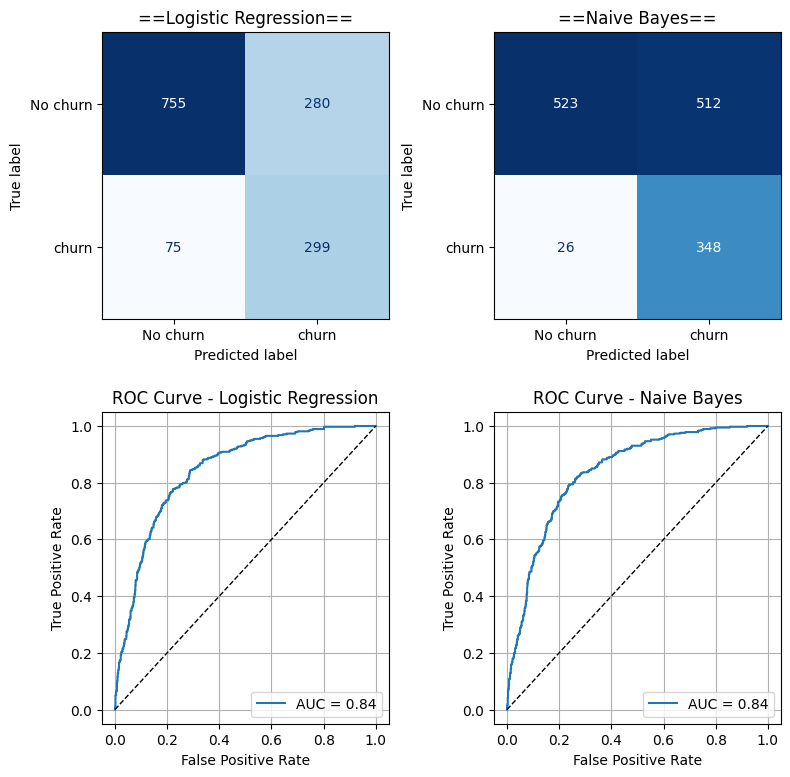

In [54]:
# Modelos seleccionados
modelos_seleccionados = modelos

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for idx, (nombre, modelo) in enumerate(modelos_seleccionados.items()):
    # Pipeline
    pipeline = ImbPipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=27)),
        ('model', modelo)
    ])

    # Entrenar
    pipeline.fit(X_train, y_train)

    # Predicciones
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # --- Matriz de Confusión ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No churn','churn'])
    disp.plot(cmap="Blues", ax=axes[idx], colorbar=False)
    axes[idx].set_title(f"=={nombre}==")

    # --- Curva ROC ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    axes[idx+2].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    axes[idx+2].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[idx+2].set_xlabel("False Positive Rate")
    axes[idx+2].set_ylabel("True Positive Rate")
    axes[idx+2].set_title(f"ROC Curve - {nombre}")
    axes[idx+2].legend(loc="lower right")
    axes[idx+2].grid(True)

plt.tight_layout()
plt.show()


Matriz de confusión

* Logistic Regression

  Verdaderos Negativos (No churn correctamente predicho): 755

  Falsos Positivos (predijo churn, pero era No churn): 280

  Falsos Negativos (predijo No churn, pero era churn): 75

  Verdaderos Positivos (Churn correctamente predicho): 299

  Detecta bien los casos de No churn y mantiene un buen balance, pero tiene un poco más de falsos negativos que Naive Bayes.

* Naive Bayes

  Verdaderos Negativos: 523

  Falsos Positivos: 512

  Falsos Negativos: 26

  Verdaderos Positivos: 348

  Tiene muy pocos falsos negativos (lo que mejora el recall), pero sufre con muchos falsos positivos, lo que podría afectar la precisión.

Curva ROC y AUC

Ambos modelos tienen AUC = 0.84, lo que significa que su capacidad de discriminar entre churn y no churn es similar.

La forma de la curva es buena para ambos, mostrando que ambos modelos superan por bastante el azar (línea diagonal).

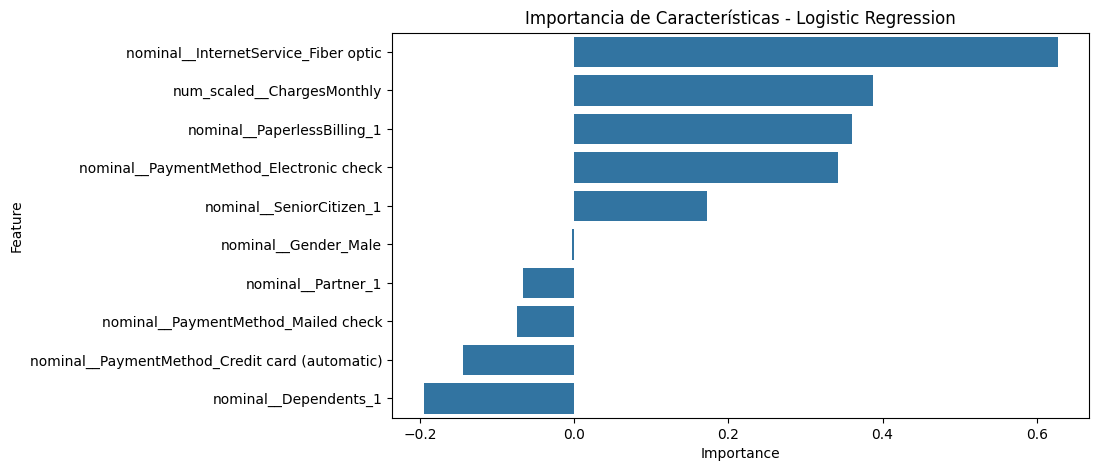

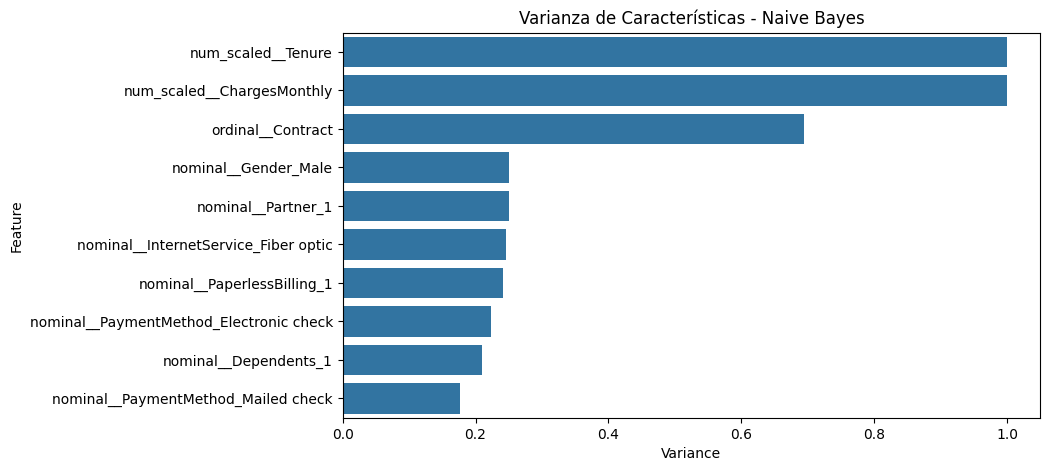

In [55]:

# Entrenar el pipeline final con todo el dataset
pipeline_lr = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=27)),
    ('model', LogisticRegression(C=0.015, random_state=27, max_iter=500))
])
pipeline_lr.fit(X, y)

# Importancias para LR
features = pipeline_lr.named_steps['preprocess'].get_feature_names_out()
coeficientes = pipeline_lr.named_steps['model'].coef_[0]

importancias_lr = pd.DataFrame({'Feature': features, 'Importance': coeficientes})
importancias_lr = importancias_lr.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(x='Importance', y='Feature', data=importancias_lr.head(10))
plt.title('Importancia de Características - Logistic Regression')
plt.show()

# Pipeline para NB
pipeline_nb = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=27)),
    ('model', GaussianNB(var_smoothing=20))
])
pipeline_nb.fit(X, y)

X_transformed = pipeline_nb.named_steps['preprocess'].transform(X)
varianzas = np.var(X_transformed, axis=0)

importancias_nb = pd.DataFrame({'Feature': features, 'Variance': varianzas})
importancias_nb = importancias_nb.sort_values(by='Variance', ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(x='Variance', y='Feature', data=importancias_nb.head(10))
plt.title('Varianza de Características - Naive Bayes')
plt.show()


* Logistic Regression – Importancia de características

  La variable con mayor peso positivo es InternetService_Fiber optic (~0.62), lo que sugiere que tener fibra óptica está fuertemente asociado con la probabilidad de churn o cancelación.

  Otras variables con importancia positiva alta:

  ChargesMonthly (cargos mensuales escalados)

  PaperlessBilling_1 (facturación electrónica)

  PaymentMethod_Electronic check

  Algunas variables tienen coeficientes cercanos a cero, lo que indica poca influencia directa.

  Hay variables con coeficientes negativos, como Dependents_1, lo que indica relación inversa con la clase objetivo.

  Interpretación clave: Logistic Regression nos da directamente el sentido y magnitud del efecto: positivo → mayor probabilidad del evento, negativo → menor probabilidad.

* Naive Bayes – Varianza de características

  En Naive Bayes, la “importancia” no se mide igual; aquí vemos varianza por característica (después de escalado/transformación).

  Variables con mayor varianza:

  Tenure (tiempo como cliente) y ChargesMonthly → varianza cercana a 1, lo que indica alta capacidad para discriminar entre clases bajo el supuesto de independencia.

  Contract (tipo de contrato) también muestra una varianza destacada.

  Variables como PaymentMethod_Mailed check tienen baja varianza, por lo que aportan menos información discriminativa.

  Interpretación clave: En Naive Bayes, mayor varianza implica mayor potencial para separar clases, pero no nos dice el sentido del efecto, solo su “capacidad” para distinguir.

##**Conclusión**


Este análisis tiene como objetivo comprender el fenómeno de evasión de clientes (Churn) en la empresa ficticia TelecomX LATAM. La evasión representa un desafío clave para empresas de telecomunicaciones, ya que retener clientes suele ser más rentable que adquirir nuevos. Mediante la exploración de datos históricos de clientes, se busca identificar patrones y factores asociados al abandono del servicio, a travéz de este ejercicio se buscó entrenar modelos de predicción de Churn, interpretar sus resultados y proponer acciones estratégicas que reduzcan la tasa de Churn.

Flujo de trabajo:

* Extracción (Los datos fueron limpiados y exportados en el challenge parte 1).

* Eliminación de columnas irrelevantes/leakeo (IDs, duplicadas o con un único   valor).

* Matriz de correlación para detectar multicolinealidad en numéricas y guiar normalización.

  * Encoding: separamos por tipo de variable:

  * numéricas → escaladas (standard/robust) donde aplicaba.

  * ordinales → codificación ordinal consistente.

  * nominales → one-hot.

* Balanceo y escalado

  Proporción de churn: desbalance presente ⇒ se aplicó SMOTE dentro del pipeline para balancear solo en train (evita fuga de info).

* Normalización/estandarización: aplicada a numéricas para estabilizar LR y NB.

* Separación de datos

  train/test estratificado para mantener la proporción de clases.

* Modelado

  Modelos base: Logistic Regression, Naive Bayes (GaussianNB), (más DT, RF, KNN para criba inicial).

  Objetivo de negocio: detectar clientes con alta probabilidad de cancelar ⇒ prioridad al recall, pero sin hundir la precisión (para no saturar al equipo).

* Visualización y evaluación

  Matriz de confusión y ROC/AUC en grilla 2×2 por modelo.

  Validación cruzada estratificada (k=5) con pipeline preprocess + SMOTE + modelo.

  Resultados (CV, configuración final):

  Logistic Regression (C≈0.015–0.01, L2, liblinear)

  accuracy: 0.739 | precision: 0.505 | recall: 0.791 | F1: 0.616 | AUC: ~0.84

  Naive Bayes (var_smoothing afinado)

  accuracy: 0.618 | precision: 0.405 | recall: 0.934 | F1: 0.565 | AUC: ~0.84

  Ambos discriminan bien (AUC~0.84). NB maximiza recall pero con muchos falsos positivos; LR ofrece mejor equilibrio (mejor accuracy y F1).

* Importancia de variables

  Logistic Regression (coeficientes, signo y magnitud):

  ↑ Riesgo (coeficientes positivos):
  InternetService_Fiber optic, ChargesMonthly, PaperlessBilling_1, PaymentMethod_Electronic check, SeniorCitizen_1.

  ↓ Riesgo (negativos):
  Dependents_1 (tener dependientes), (y Tenure típicamente negativo; en LR no quedó top, pero…).

  Naive Bayes (proxy por varianza post-transformación):

  Alta capacidad discriminativa: Tenure, ChargesMonthly, Contract (ordinal).

  Interpretable como: mayor Tenure suele asociarse a menor churn; contratos Month-to-month tienden a mayor churn.

  Coincidencias: ChargesMonthly y Contract/Tenure emergen como factores claves en ambos enfoques.
  Discrepancias esperables por el modelo: LR captura dirección del efecto; NB resalta dispersión (capacidad de separar).

* **Elección de modelo**

  Se elige Logistic Regression como modelo final porque:

  Mantiene recall alto (~0.79) sin disparar falsos positivos.

  Mejor F1 y accuracy que NB con similar AUC.

  Coeficientes interpretables para explicar factores de churn.

  Nota operativa: si el negocio prioriza máximo recall por encima de todo, NB queda como alternativa con umbral/filtrado posterior. Para balance operativo, LR gana.

* Factores que más influyen en la cancelación

  * Servicio de Internet: Fiber optic ↑ riesgo.

  * Cargos mensuales (ChargesMonthly) ↑ riesgo a medida que suben.

  * Tipo de contrato (Contract): Month-to-month ↑ riesgo frente a 1–2 años.

  * Antigüedad (Tenure): mayor tenure ↓ riesgo.

  * Método de pago: Electronic check ↑ riesgo (vs. débito/credit auto).

  * PaperlessBilling (en tu LR quedó con coeficiente positivo) asociado a ↑ riesgo.

  * SeniorCitizen: ligera ↑ de riesgo.

  * Dependents: presencia de dependientes ↓ riesgo.

Importante: son asociaciones en el dataset, útiles para acción, no causalidad estricta.

* Estrategias de retención sugeridas

  * Contratos: migrar month-to-month a planes de mayor plazo con incentivos (descuentos escalonados, beneficios exclusivos).

  * Precio: segmentar por ChargesMonthly altos y ofrecer bundles o descuentos temporales para aliviar fricción de precio.

  * Clientes Fiber optic: campañas proactivas (mejoras de servicio, upgrades de router, priorización de soporte).

  * Método de pago: nudges para cambiar Electronic check → auto-pago (tarjeta/débito) con bonificación inicial.

  * Onboarding y lealtad: reforzar a clientes nuevos (bajo Tenure) con experiencias guiadas, check-ins tempranos y perks de permanencia.

  * Segmentos sensibles (SeniorCitizen): líneas de atención dedicadas y planes simplificados.

  * Monitoreo continuo: usar la probabilidad de churn de LR para campañas semanales; ajustar umbral según capacidad del equipo y resultados (si se requiere mayor recall, bajar umbral ligeramente).

**En resumen**

Se construyó un pipeline completo con balanceo SMOTE, encoding por tipo de variable, normalización y CV; se compararon modelos y se seleccionó Logistic Regression por mejor equilibrio (recall alto con precisión razonable, AUC~0.84, mejor F1).

Factores clave: Fiber optic, ChargesMonthly, Contract (month-to-month), Tenure, Electronic check, PaperlessBilling, SeniorCitizen, Dependents.

Estrategias de retención: migración de contratos, alivio de precio, mejoras proactivas en fibra, cambio de método de pago, acompañamiento a nuevos/senior, y operación guiada por probabilidades del modelo.